In [1]:
from fastai.vision.all import *
import PIL
path =  Path('/home/jupyter/VLP')


In [2]:
df  = pd.read_csv(path/'captioned.csv')

In [3]:
HATE_PATH = Path('/home/jupyter/mmf_data/datasets/hateful_memes/defaults/')
def id_to_img_path(id):
    id = f'{int(id):05d}'
    return str(HATE_PATH/f'images/img/{id}.png')

In [4]:
df[:9000]

,id,img,label,text,caption,is_valid,tex_cap
0,42953,img/42953.png,0.0,its their character not their color that matters,A man in a black shirt is looking at the camera .,False,A man in a black shirt is looking at the camera . <meme> its their character not their color that matters
1,23058,img/23058.png,0.0,don't be afraid to love again everyone is not like your ex,A man in a suit is talking to a woman in a white shirt .,False,A man in a suit is talking to a woman in a white shirt . <meme> don't be afraid to love again everyone is not like your ex
2,13894,img/13894.png,0.0,putting bows on your pet,A cat with a red bow tied around its neck sits next to a pillow .,False,A cat with a red bow tied around its neck sits next to a pillow . <meme> putting bows on your pet
3,37408,img/37408.png,0.0,i love everything and everybody! except for squirrels i hate squirrels,A black dog is looking at the camera .,False,A black dog is looking at the camera . <meme> i love everything and everybody! except for squirrels i hate squirrels
4,82403,img/82403.png,0.0,"everybody loves chocolate chip cookies, even hitler",A man in a suit is talking .,False,"A man in a suit is talking . <meme> everybody loves chocolate chip cookies, even hitler"
...,...,...,...,...,...,...,...
8995,83675,img/83675.png,0.0,i'm gonna be like phelps one day,A swimmer wearing a red helmet is swimming .,True,A swimmer wearing a red helmet is swimming . <meme> i'm gonna be like phelps one day
8996,37198,img/37198.png,0.0,when you're so relaxed you can feel yourself go to the next level,A man is lying on the grass .,True,A man is lying on the grass . <meme> when you're so relaxed you can feel yourself go to the next level
8997,48670,img/48670.png,0.0,look at this sandwich maker club i found on wish on clearance,there is a bread on a grill .,True,there is a bread on a grill . <meme> look at this sandwich maker club i found on wish on clearance
8998,9863,img/09863.png,0.0,diverse group of women,A group of women pose for a picture .,True,A group of women pose for a picture . <meme> diverse group of women


In [5]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_x=ColReader('img', pref=f'{HATE_PATH}/images/'),
                           get_y=ColReader('label'),
                           splitter=ColSplitter('is_valid'),
                           item_tfms=RandomResizedCrop(128),
                           batch_tfms=aug_transforms())
dls = ImageDataLoaders.from_dblock(dblock,df[:9000], path)

In [10]:
batch = dls.train.one_batch()

In [16]:
dls.show_batch??

Signature:
dls.show_batch(
    b=None,
    max_n=9,
    ctxs=None,
    show=True,
    unique=False,
    **kwargs,
)
Docstring: <no docstring>
Source:   
    def show_batch(self, b=None, max_n=9, ctxs=None, show=True, unique=False, **kwargs):
        if unique:
            old_get_idxs = self.get_idxs
            self.get_idxs = lambda: Inf.zeros
        if b is None: b = self.one_batch()
        if not show: return self._pre_show_batch(b, max_n=max_n)
        show_batch(*self._pre_show_batch(b, max_n=max_n), ctxs=ctxs, max_n=max_n, **kwargs)
        if unique: self.get_idxs = old_get_idxs
File:      /opt/conda/envs/vlp/lib/python3.6/site-packages/fastai/data/core.py
Type:      method


In [13]:
preshow = dls.train._pre_show_batch(batch)
type(preshow)
[type(p) for p in preshow]

[fastai.torch_core.TensorImage,
 fastai.torch_core.TensorCategory,
 fastcore.foundation.L]

In [18]:
preshow[2][0]

(TensorImage([[[ 43,  43,  44,  ..., 118, 158, 201],
          [ 42,  43,  44,  ..., 150, 190, 221],
          [ 42,  43,  43,  ..., 182, 213, 227],
          ...,
          [164, 163, 162,  ..., 104, 102, 101],
          [162, 161, 160,  ..., 109, 105, 102],
          [160, 157, 156,  ..., 115, 109, 103]],
 
         [[ 29,  30,  31,  ...,  95, 129, 165],
          [ 29,  30,  30,  ..., 118, 151, 178],
          [ 29,  30,  30,  ..., 140, 164, 181],
          ...,
          [139, 139, 139,  ...,  86,  84,  82],
          [139, 139, 140,  ...,  90,  87,  83],
          [138, 138, 138,  ...,  96,  90,  85]],
 
         [[ 19,  20,  20,  ...,  72,  98, 128],
          [ 20,  20,  21,  ...,  86, 112, 137],
          [ 21,  21,  21,  ...,  98, 117, 137],
          ...,
          [112, 114, 116,  ...,  71,  68,  66],
          [114, 115, 117,  ...,  75,  71,  67],
          [115, 115, 118,  ...,  81,  74,  69]]]),
 '1.0')

In [35]:
dls.train.get_idxs()[:5]

[5897, 257, 6547, 4680, 6126]

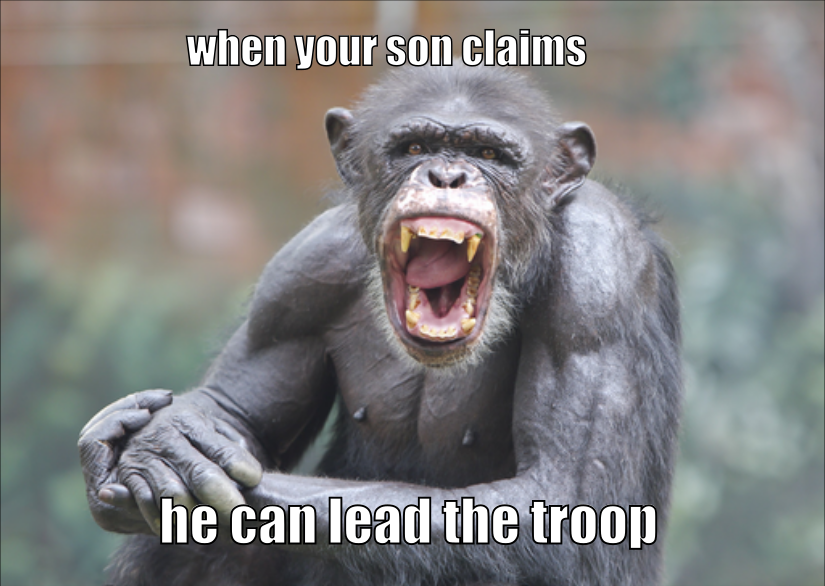

In [25]:

PIL.Image.open(id_to_img_path(63052))

In [21]:
df.iloc[idxs]

,id,img,label,text,caption,is_valid,tex_cap
7449,63052,img/63052.png,0.0,when your son claims he can lead the troop,A gorilla with his mouth open .,False,A gorilla with his mouth open . <meme> when your son claims he can lead the troop
2978,71463,img/71463.png,0.0,mamma! this goat scares me,A little girl in a pink shirt running .,False,A little girl in a pink shirt running . <meme> mamma! this goat scares me
7413,50813,img/50813.png,0.0,the white house is a dump because trump filled it with trash,A woman in a red shirt is laughing .,False,A woman in a red shirt is laughing . <meme> the white house is a dump because trump filled it with trash
6400,94150,img/94150.png,1.0,america be like never forget get over it,A poster for a movie .,False,A poster for a movie . <meme> america be like never forget get over it
7737,14078,img/14078.png,1.0,white people just nasty!!!,A man with a black hat is making a funny face .,False,A man with a black hat is making a funny face . <meme> white people just nasty!!!
...,...,...,...,...,...,...,...
4836,56193,img/56193.png,1.0,how to cook turkey in usa how to cook turkey in romania,A poster of a woman with a crown .,False,A poster of a woman with a crown . <meme> how to cook turkey in usa how to cook turkey in romania
559,71289,img/71289.png,0.0,after smelling that home cooked meal,A man with a dirty face is looking at the camera .,False,A man with a dirty face is looking at the camera . <meme> after smelling that home cooked meal
7296,2483,img/02483.png,0.0,group of people rescued from medditaranian sea by italian coast guard,A ship in the water .,False,A ship in the water . <meme> group of people rescued from medditaranian sea by italian coast guard
5547,49173,img/49173.png,0.0,women recieve support as their crops burn,Two women are walking down the street .,False,Two women are walking down the street . <meme> women recieve support as their crops burn


In [12]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, RocAucBinary()])
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.059110,0.888837,0.496000,0.502512,00:26


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.763770,0.787735,0.516000,0.522064,00:26
1,0.704654,0.775935,0.508000,0.488256,00:26
2,0.671794,0.759294,0.488000,0.511936,00:26
3,0.651675,0.742902,0.508000,0.545312,00:26
4,0.634573,0.739180,0.514000,0.549136,00:26


In [139]:
learn.save('res34')

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats
...,...,...,...
995,3869,img/03869.png,a mother's love for the child is a divine thing
996,23817,img/23817.png,sea monkeys
997,56280,img/56280.png,little miss muffet sat on her tuffet
998,29384,img/29384.png,they're in a row


In [154]:
def gen_submit(learn, fname):
    test_df = pd.read_json(path/'test.jsonl', lines=True)
    test_dl = learn.dls.test_dl(test_df)
    preds = learn.get_preds(dl=test_dl)[0]
    probs= preds[:,1]
    submit_df = pd.DataFrame()
    submit_df['id'] = test_df['id']
    submit_df['proba'] = probs
    submit_df['label'] = indcs
    submit_df = submit_df.set_index('id')
    submit_df.to_csv(fname, header=True)

In [155]:
gen_submit(learn, path/'attempt1.csv')

In [148]:
s

In [149]:
submit_df

,proba,label
id,,
16395,0.769978,0
37405,0.599912,0
94180,0.520897,0
54321,0.832810,0
97015,0.543728,1
...,...,...
3869,0.878503,0
23817,0.899243,0
56280,0.724428,0
